<a href="https://colab.research.google.com/github/fowardelcac/Seminario-en-ciencia-de-datos/blob/main/Tp1/Visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/Wine_filtered.xlsx')
df.head()

,Pais,Continente,Provincia,region_1,Descripcion,Sentimiento,Viñedo_especifico,Variedad,Bodega,Año,Antiguedad,Puntos,Precio,Ratio_puntos_precio
0,Italy,Europa,Sicily & Sardinia,Etna,aroma include tropical fruit broom brimstone d...,Positiva,Vulkà Bianco,White Blend,Nicosia,2013,11,87,28,3.107143
1,Portugal,Europa,Douro,Unknown,ripe fruity wine smooth structured firm tannin...,Positiva,Avidagos,Portuguese Red,Quinta dos Avidagos,2011,13,87,15,5.800000
2,US,America del norte,Michigan,Lake Michigan Shore,pineapple rind lemon pith orange blossom start...,Positiva,Reserve Late Harvest,Riesling,St. Julian,2013,11,87,13,6.692308
3,US,America del norte,Oregon,Willamette Valley,like regular bottling come rough tannic rustic...,Positiva,Vintner's Reserve Wild Child Block,Pinot Noir,Sweet Cheeks,2012,12,87,65,1.338462
4,Spain,Europa,Northern Spain,Navarra,blackberry raspberry aroma typical navarran wh...,Positiva,Ars In Vitro,Tempranillo-Merlot,Tandem,2011,13,87,15,5.800000


In [2]:
df['Continente'] = df['Continente'].replace({"Europa": "Europe",
                                             "America del norte": "North America",
                                             "America del sur": "South America"})


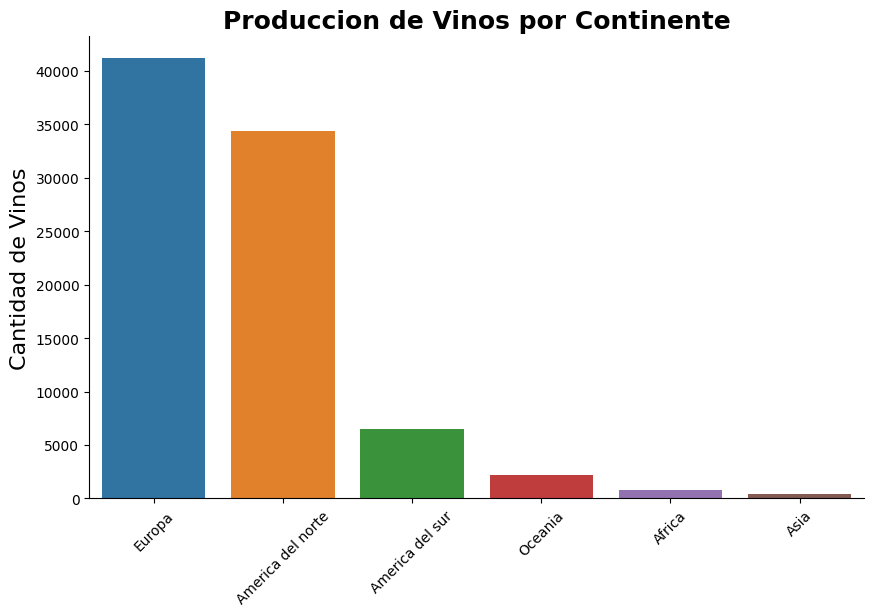

In [8]:
continente_counts = df['Continente'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=continente_counts.index, y=continente_counts.values,hue=continente_counts.index, legend=False)

plt.title('Produccion de Vinos por Continente', fontsize=18, weight='bold')

plt.xlabel('')
plt.ylabel('Cantidad de Vinos', fontsize=16)
plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


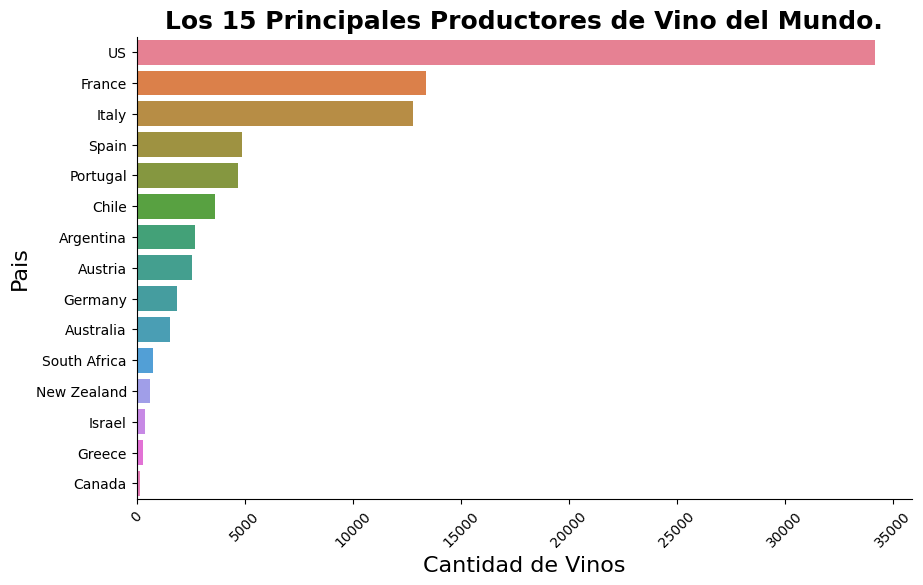

In [9]:
pais_counts = df['Pais'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=pais_counts.index, x=pais_counts.values, hue=pais_counts.index)

plt.title("Los 15 Principales Productores de Vino del Mundo.", fontsize=18, weight='bold')

plt.xlabel('Cantidad de Vinos', fontsize=16)
plt.ylabel('Pais', fontsize=16)
plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

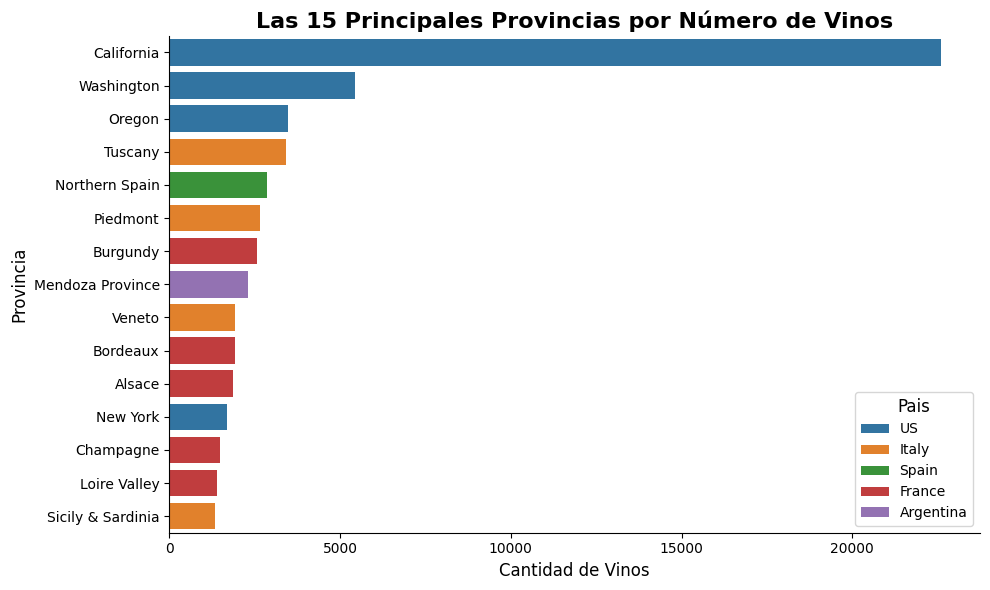

In [10]:
province_counts = df.groupby(['Provincia', 'Pais'])["Provincia"].count().sort_values(ascending=False).head(15).reset_index(name="Count")


plt.figure(figsize=(10, 6))

# Crear el gráfico de barras coloreado por país
sns.barplot(y='Provincia', x='Count', hue='Pais', data=province_counts)

# Personalizar el gráfico
plt.title('Las 15 Principales Provincias por Número de Vinos', fontsize=16, weight='bold')
plt.xlabel('Cantidad de Vinos', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.legend(title='Pais', fontsize=10, title_fontsize=12)

# Mejorar el layout y mostrar el gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

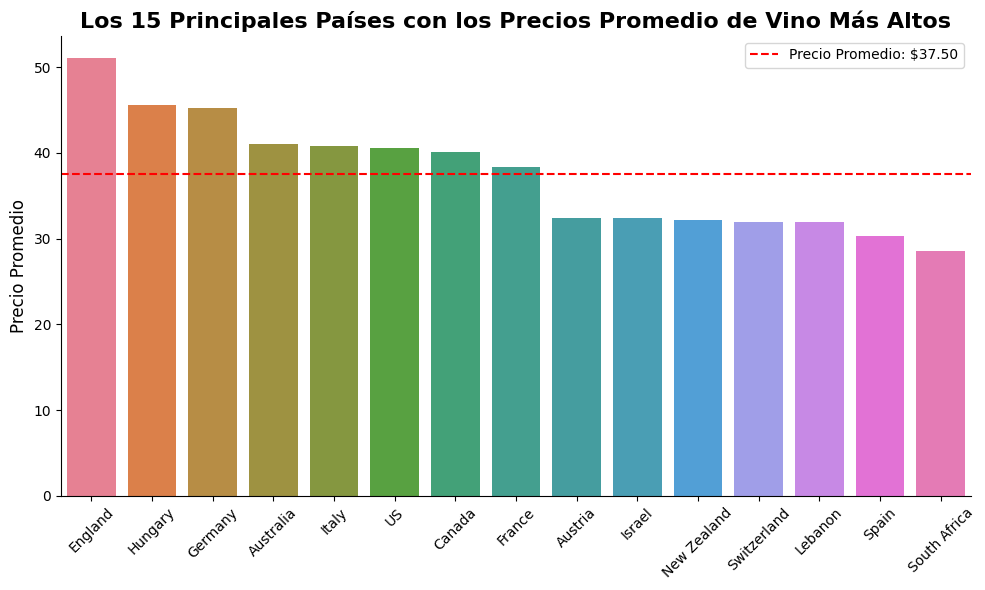

In [11]:
country_by_points = df.groupby("Pais")["Precio"].mean().sort_values(ascending=False).head(15)

average_price = country_by_points.mean()
plt.figure(figsize=(10, 6))

sns.barplot(y=country_by_points.values, x=country_by_points.index, hue=country_by_points.index)

plt.axhline(y=average_price, color='red', linestyle='--', label=f'Precio Promedio: ${average_price:.2f}')

plt.title('Los 15 Principales Países con los Precios Promedio de Vino Más Altos', fontsize=16, weight='bold')
plt.ylabel('Precio Promedio', fontsize=12)
plt.xlabel('')

plt.xticks(rotation=45)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

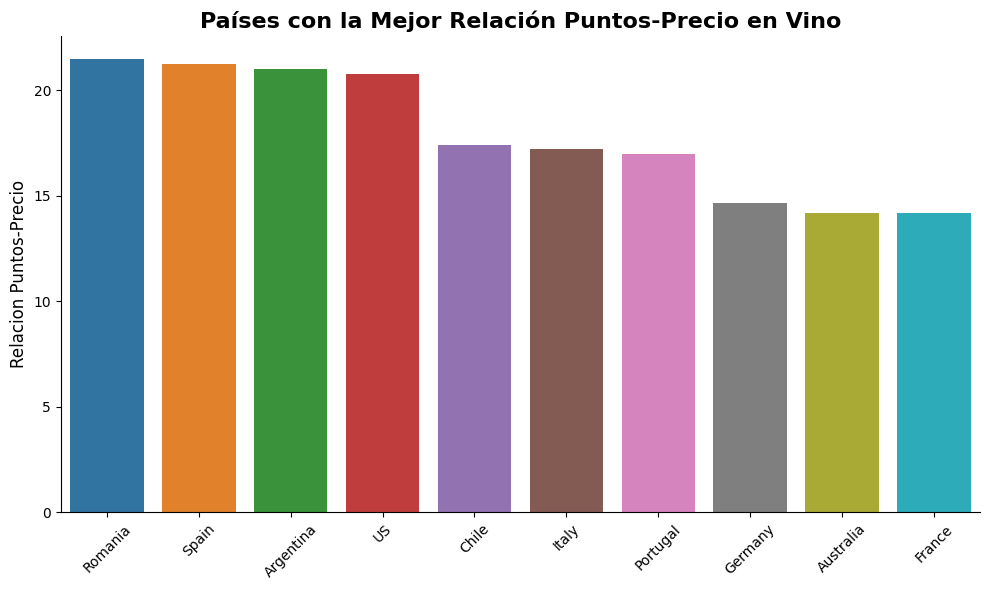

In [12]:
country_by_points = df.groupby("Pais")["Ratio_puntos_precio"].max().sort_values(ascending=False).head(10)

average_price = country_by_points.mean()
plt.figure(figsize=(10, 6))

sns.barplot(y=country_by_points.values, x=country_by_points.index, hue=country_by_points.index)


plt.title('Países con la Mejor Relación Puntos-Precio en Vino', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('Relacion Puntos-Precio', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

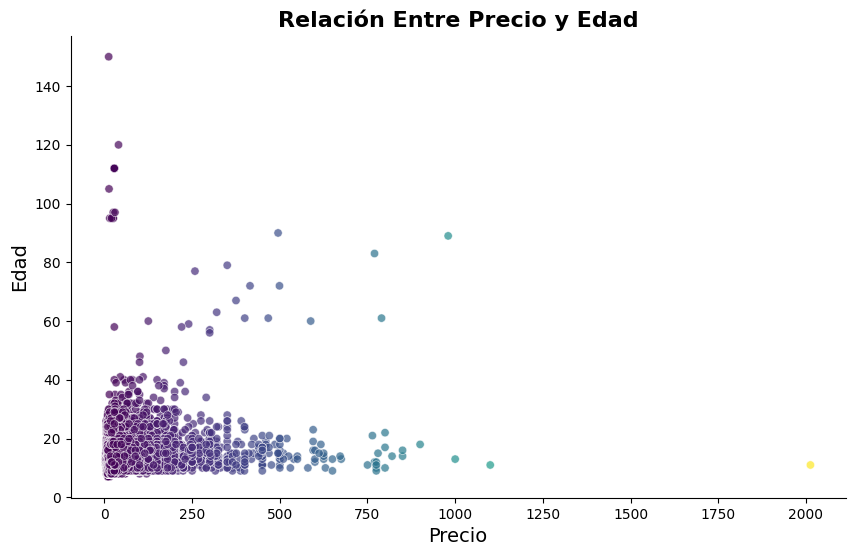

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Precio", y="Antiguedad", data=df,
                hue="Precio",
                legend=False,
                palette="viridis",  # Paleta de colores
                marker="o",        # Tipo de marcador
                alpha=0.7)         # Transparencia de los puntos

# Añadir títulos y etiquetas
plt.title('Relación Entre Precio y Edad', fontsize=16, weight='bold')
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Edad', fontsize=14)

# Ajustar el tamaño de los ticks
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
wineries = df.Bodega.value_counts().sort_values(ascending=False).head(20)


,count
Bodega,
Wines & Winemakers,211
DFJ Vinhos,200
Testarossa,188
Williams Selyem,178
Georges Duboeuf,171
Concha y Toro,154
Columbia Crest,145
Kendall-Jackson,119
Chateau Ste. Michelle,118


In [ ]:
df.columns

Index(['Pais', 'Continente', 'Provincia', 'region_1', 'Descripcion',
       'Sentimiento', 'Viñedo_especifico', 'Variedad', 'Bodega', 'Año',
       'Antiguedad', 'Puntos', 'Precio', 'Ratio_puntos_precio'],
      dtype='object')

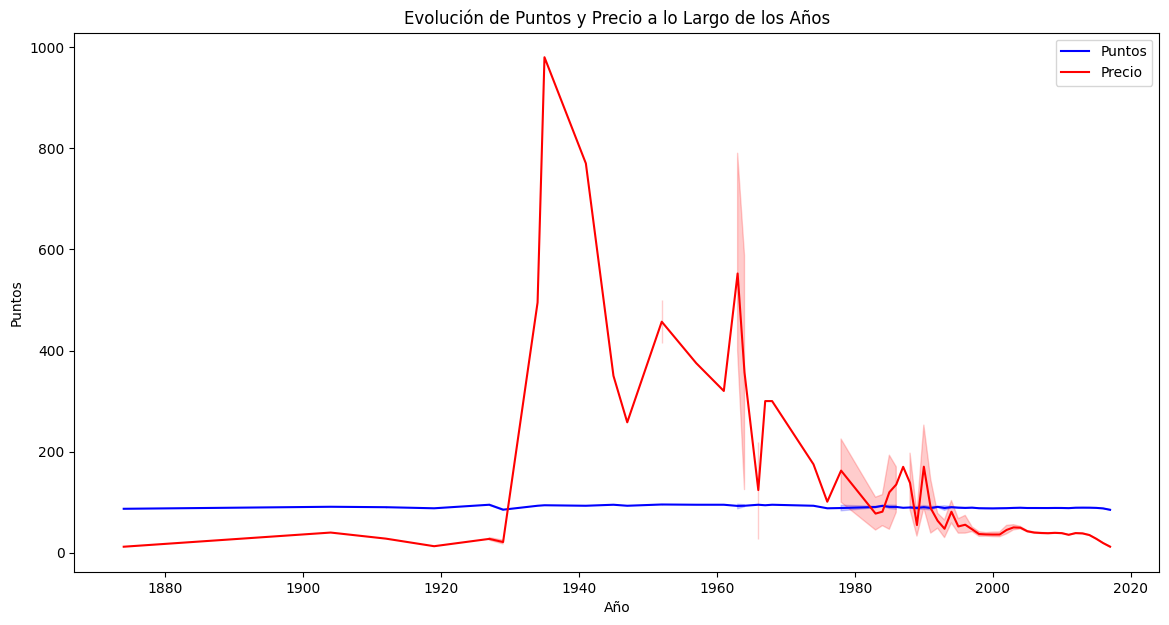

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Año', y='Puntos', data=df, label='Puntos', color='blue')
sns.lineplot(x='Año', y='Precio', data=df, label='Precio', color='red')
plt.title('Evolución de Puntos y Precio a lo Largo de los Años')
plt.legend()
plt.show()
